In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import ppscore as pps

from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool, cv

In [2]:
df = pd.read_csv('./data/amazon/train.csv', sep=',', header='infer')

In [3]:
y = df['ACTION']
X = df.drop('ACTION', axis=1)

In [4]:
cat_features = list(range(0, X.shape[1]))

In [5]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=23)

In [6]:
train_pool = Pool(
    data=X_train, 
    label=y_train, 
    cat_features=cat_features
)

validation_pool = Pool(
    data=X_validation, 
    label=y_validation, 
    cat_features=cat_features
)

In [9]:
X.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [10]:
train_df = X.join(y)

In [11]:
train_df.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ACTION
0,39353,85475,117961,118300,123472,117905,117906,290919,117908,1
1,17183,1540,117961,118343,123125,118536,118536,308574,118539,1
2,36724,14457,118219,118220,117884,117879,267952,19721,117880,1
3,36135,5396,117961,118343,119993,118321,240983,290919,118322,1
4,42680,5905,117929,117930,119569,119323,123932,19793,119325,1


In [52]:
pps.NUMERIC_AS_CATEGORIC_BREAKPOINT = train_df.shape[0]

In [53]:
edge_list = []
for i in X.columns:
    for j in train_df.columns:
        if i != j:
            print(j)
            score = pps.score(train_df, i, j, task="classification")['ppscore']
            if score == 0:
                score = 1e-5
            edge_list.append((j, i, score))
            
for i in X.columns:
    edge_list.append((i, "ACTION", 1e-5))

MGR_ID


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


ROLE_ROLLUP_1
ROLE_ROLLUP_2
ROLE_DEPTNAME


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


ROLE_TITLE
ROLE_FAMILY_DESC


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


ROLE_FAMILY
ROLE_CODE
ACTION
RESOURCE


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


ROLE_ROLLUP_1
ROLE_ROLLUP_2
ROLE_DEPTNAME


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


ROLE_TITLE
ROLE_FAMILY_DESC


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


ROLE_FAMILY
ROLE_CODE
ACTION
RESOURCE


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


MGR_ID
ROLE_ROLLUP_2
ROLE_DEPTNAME
ROLE_TITLE
ROLE_FAMILY_DESC


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  

ROLE_FAMILY
ROLE_CODE
ACTION
RESOURCE
MGR_ID


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  

ROLE_ROLLUP_1
ROLE_DEPTNAME
ROLE_TITLE
ROLE_FAMILY_DESC
ROLE_FAMILY
ROLE_CODE
ACTION


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  

RESOURCE
MGR_ID


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


ROLE_ROLLUP_1
ROLE_ROLLUP_2
ROLE_TITLE
ROLE_FAMILY_DESC
ROLE_FAMILY
ROLE_CODE


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  

ACTION
RESOURCE
MGR_ID


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


ROLE_ROLLUP_1
ROLE_ROLLUP_2
ROLE_DEPTNAME
ROLE_FAMILY_DESC
ROLE_FAMILY
ROLE_CODE


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  

ACTION
RESOURCE


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


MGR_ID


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


ROLE_ROLLUP_1
ROLE_ROLLUP_2
ROLE_DEPTNAME


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


ROLE_TITLE
ROLE_FAMILY
ROLE_CODE
ACTION
RESOURCE


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  

MGR_ID
ROLE_ROLLUP_1
ROLE_ROLLUP_2
ROLE_DEPTNAME
ROLE_TITLE
ROLE_FAMILY_DESC
ROLE_CODE


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  

ACTION
RESOURCE
MGR_ID


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


ROLE_ROLLUP_1
ROLE_ROLLUP_2
ROLE_DEPTNAME
ROLE_TITLE
ROLE_FAMILY_DESC


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  

ROLE_FAMILY
ACTION


/Users/joafigu/src/python/graph-fs/.venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


In [30]:
edge_list

[('MGR_ID', 'RESOURCE', 1e-05),
 ('ROLE_ROLLUP_1', 'RESOURCE', 1e-05),
 ('ROLE_ROLLUP_2', 'RESOURCE', 1e-05),
 ('ROLE_DEPTNAME', 'RESOURCE', 1e-05),
 ('ROLE_TITLE', 'RESOURCE', 1e-05),
 ('ROLE_FAMILY_DESC', 'RESOURCE', 1e-05),
 ('ROLE_FAMILY', 'RESOURCE', 0.1995266298596985),
 ('ROLE_CODE', 'RESOURCE', 1e-05),
 ('ACTION', 'RESOURCE', 1e-05),
 ('RESOURCE', 'MGR_ID', 1e-05),
 ('ROLE_ROLLUP_1', 'MGR_ID', 0.19141868807988116),
 ('ROLE_ROLLUP_2', 'MGR_ID', 0.17069753328190274),
 ('ROLE_DEPTNAME', 'MGR_ID', 0.3029804790579146),
 ('ROLE_TITLE', 'MGR_ID', 1e-05),
 ('ROLE_FAMILY_DESC', 'MGR_ID', 0.14132138661329585),
 ('ROLE_FAMILY', 'MGR_ID', 0.5957951654803737),
 ('ROLE_CODE', 'MGR_ID', 1e-05),
 ('ACTION', 'MGR_ID', 1e-05),
 ('RESOURCE', 'ROLE_ROLLUP_1', 1e-05),
 ('MGR_ID', 'ROLE_ROLLUP_1', 0.025750676356743663),
 ('ROLE_ROLLUP_2', 'ROLE_ROLLUP_1', 0.6164132196774419),
 ('ROLE_DEPTNAME', 'ROLE_ROLLUP_1', 1e-05),
 ('ROLE_TITLE', 'ROLE_ROLLUP_1', 1e-05),
 ('ROLE_FAMILY_DESC', 'ROLE_ROLLUP_1', 1

In [31]:
g = nx.DiGraph()
g.add_weighted_edges_from(edge_list)

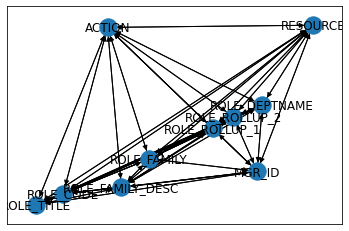

In [32]:
nx.draw_networkx(g)

In [33]:
page_rank = nx.pagerank_numpy(g)

In [34]:
rank_df = pd.DataFrame.from_dict({"node": list(page_rank.keys()), "rank": list(page_rank.values())})

In [35]:
rank_df.sort_values(by=['rank'])

,node,rank
1,RESOURCE,0.016361
9,ACTION,0.016561
7,ROLE_FAMILY,0.034507
4,ROLE_DEPTNAME,0.077186
6,ROLE_FAMILY_DESC,0.084116
2,ROLE_ROLLUP_1,0.137700
3,ROLE_ROLLUP_2,0.147160
0,MGR_ID,0.150880
5,ROLE_TITLE,0.163570
8,ROLE_CODE,0.171959


In [51]:
pps.NUMERIC_AS_CATEGORIC_BREAKPOINT

15